In [23]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [24]:
data = pd.read_csv("data.csv")
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [25]:
print(data.describe())

               Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [27]:
data.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [28]:
print(data.isnull().sum())

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


# 🧹 Čišćenje podataka: null vrijednosti i duplikati

In [29]:
data['Engine Fuel Type'] = data['Engine Fuel Type'].fillna(data['Engine Fuel Type'].mode()[0])
data['Engine HP'] = data['Engine HP'].fillna(data['Engine HP'].median())
data['Engine Cylinders'] = data['Engine Cylinders'].fillna(data['Engine Cylinders'].median())
data['Number of Doors'] = data['Number of Doors'].fillna(data['Number of Doors'].mode()[0])
data.drop('Market Category', axis=1, inplace=True)
data.drop('Model', axis=1, inplace=True)

In [30]:
print(data.duplicated().sum()) 
data.drop_duplicates(inplace=True)

729


In [31]:
print(data['Vehicle Size'].value_counts())
print(data['Vehicle Style'].value_counts())
print(data['Driven_Wheels'].value_counts())
print(data['Engine Fuel Type'].value_counts())
print(data['Transmission Type'].value_counts())

Vehicle Size
Compact    4391
Midsize    4118
Large      2676
Name: count, dtype: int64
Vehicle Style
Sedan                  2837
4dr SUV                2434
Coupe                  1175
Convertible             741
4dr Hatchback           663
Crew Cab Pickup         654
Extended Cab Pickup     593
Wagon                   562
2dr Hatchback           409
Passenger Minivan       389
Regular Cab Pickup      345
Passenger Van           121
2dr SUV                  91
Cargo Van                84
Cargo Minivan            59
Convertible SUV          28
Name: count, dtype: int64
Driven_Wheels
front wheel drive    4345
rear wheel drive     3209
all wheel drive      2308
four wheel drive     1323
Name: count, dtype: int64
Engine Fuel Type
regular unleaded                                6647
premium unleaded (required)                     1956
premium unleaded (recommended)                  1392
flex-fuel (unleaded/E85)                         887
diesel                                           150

In [32]:
data['Transmission Type'] = data['Transmission Type'].replace('UNKNOWN', 'AUTOMATIC')
fuel_mapping = {
    'regular unleaded': 'regular',
    'premium unleaded (required)': 'premium',
    'premium unleaded (recommended)': 'premium',
    'flex-fuel (unleaded/E85)': 'flex-fuel',
    'flex-fuel (premium unleaded required/E85)': 'flex-fuel',
    'flex-fuel (premium unleaded recommended/E85)': 'flex-fuel',
    'flex-fuel (unleaded/natural gas)': 'flex-fuel',
    'diesel': 'diesel',
    'electric': 'electric',
    'natural gas': 'natural gas'
}
data['Engine Fuel Type'] = data['Engine Fuel Type'].map(fuel_mapping)

current_year = 2025
data['Vehicle Age'] = current_year - data['Year']
data.drop('Year', axis=1, inplace=True)

In [ ]:
def simplify_vehicle_style(style):
    if style in ['4dr SUV', '2dr SUV', 'Convertible SUV']:
        return 'SUV'
    elif style in ['2dr Hatchback', '4dr Hatchback']:
        return 'Hatchback'
    elif style in ['Crew Cab Pickup', 'Extended Cab Pickup', 'Regular Cab Pickup']:
        return 'Pickup'
    elif style in ['Passenger Minivan', 'Passenger Van', 'Cargo Van', 'Cargo Minivan']:
        return 'Van'
    elif style in ['Sedan']:
        return 'Sedan'
    elif style in ['Coupe']:
        return 'Coupe'
    elif style in ['Convertible']:
        return 'Convertible'
    elif style in ['Wagon']:
        return 'Wagon'
    else:
        return 'Other'

# Primjena funkcije
data['Vehicle Style'] = data['Vehicle Style'].apply(simplify_vehicle_style)

# Provjera nove raspodjele
print(data['Vehicle Style'].value_counts())

In [33]:
print(data['Make'].value_counts())

Make
Chevrolet        1083
Ford              824
Toyota            716
Volkswagen        568
Nissan            551
Dodge             522
GMC               482
Honda             433
Mazda             412
Cadillac          396
Suzuki            342
Mercedes-Benz     341
Infiniti          328
BMW               324
Audi              321
Volvo             266
Hyundai           259
Acura             246
Subaru            239
Kia               229
Mitsubishi        208
Lexus             202
Buick             190
Chrysler          187
Pontiac           181
Lincoln           160
Land Rover        139
Porsche           136
Oldsmobile        129
Saab              109
Aston Martin       91
Bentley            74
Plymouth           71
Ferrari            69
FIAT               62
Scion              60
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Genes

# 📊 Vizualizacija podataka

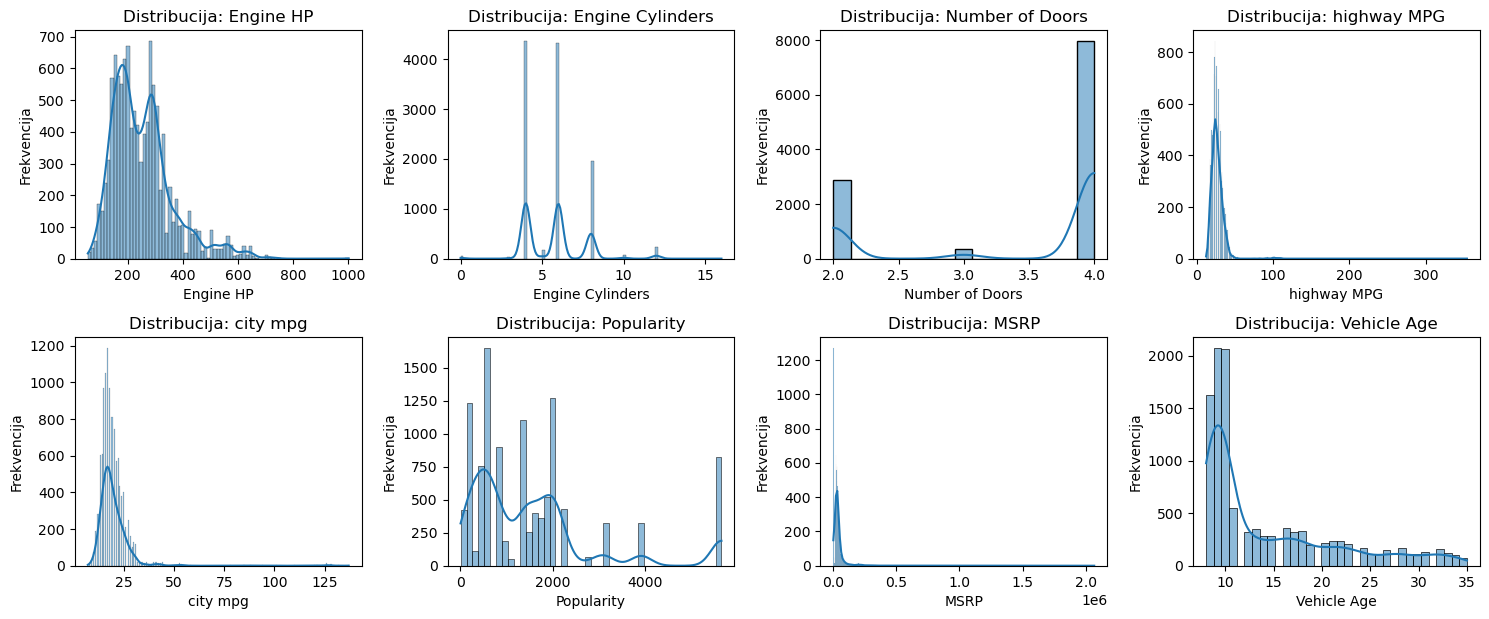

In [34]:

numerical_columns = ['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP', 'Vehicle Age']
plt.figure(figsize=(15, 12))

for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    
    sns.histplot(data[column], kde=True)
    
    plt.title(f'Distribucija: {column}')
    plt.xlabel(column)
    plt.ylabel('Frekvencija')

plt.tight_layout()
plt.show()

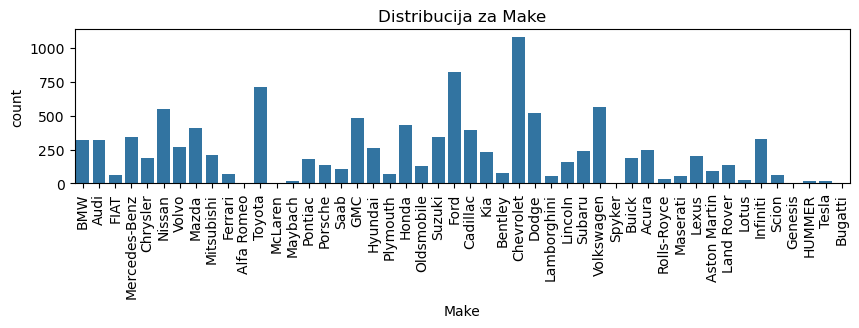

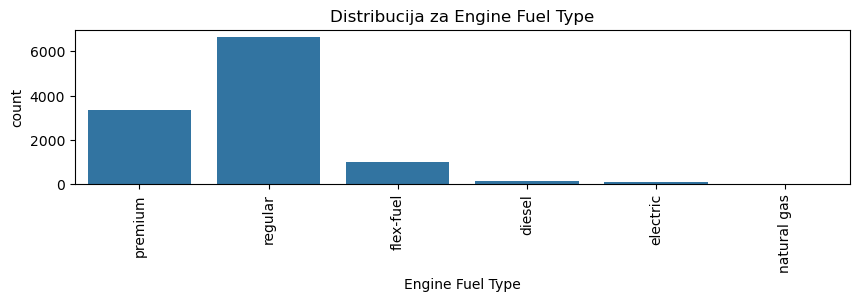

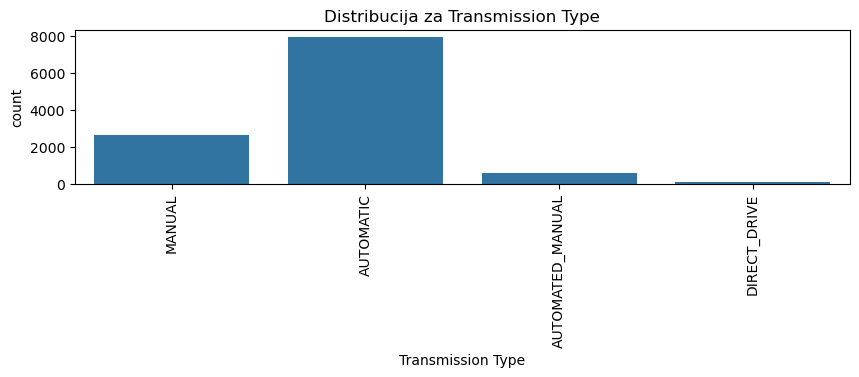

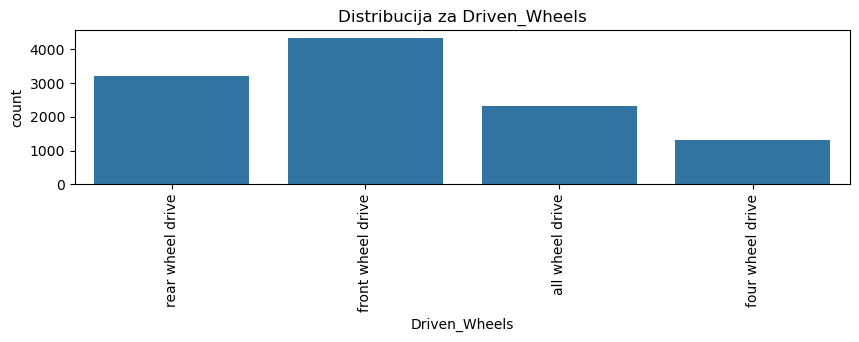

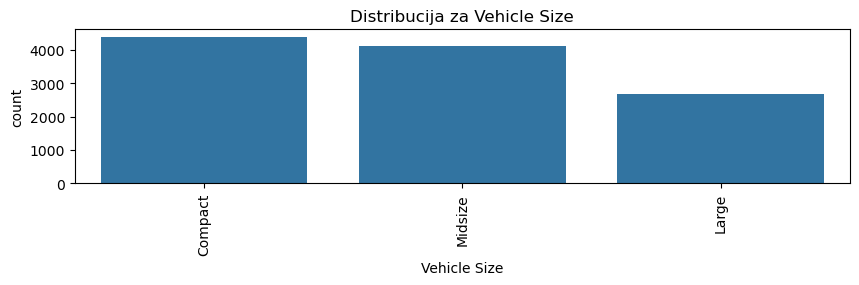

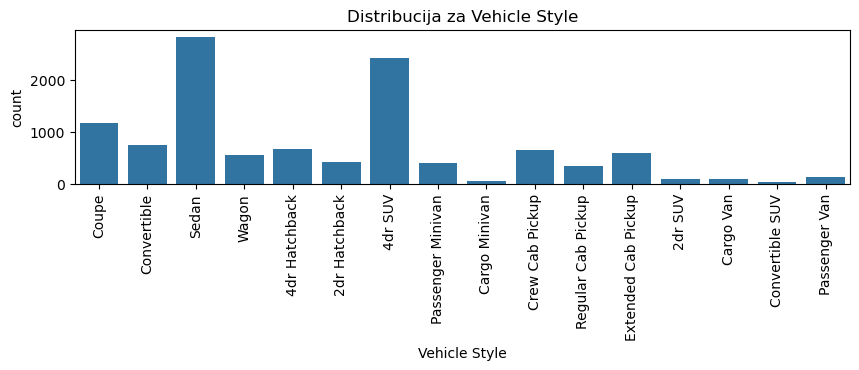

In [35]:
categorical_columns = ['Make', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
# Vizualizacija distribucije kategorijskih varijabli
for col in categorical_columns:
    plt.figure(figsize=(10, 2))
    sns.countplot(data=data, x=col)
    plt.title(f"Distribucija za {col}")
    plt.xticks(rotation=90)
    plt.show()

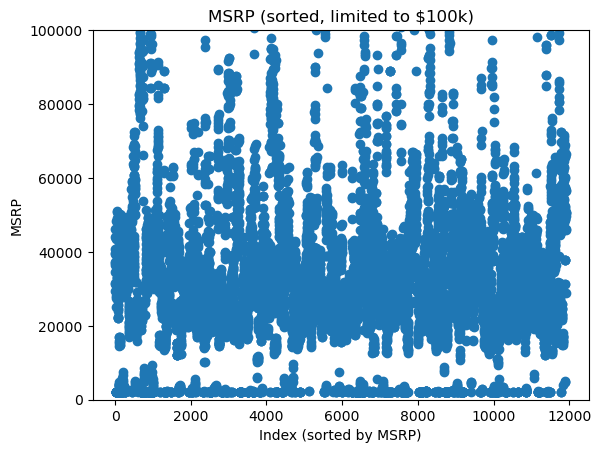

In [36]:

sorted_data = data.sort_values(by='MSRP')
plt.scatter(sorted_data.index, sorted_data['MSRP'])
plt.ylim(0, 100000)
plt.ylabel('MSRP')
plt.xlabel('Index (sorted by MSRP)')
plt.title('MSRP (sorted, limited to $100k)')
plt.show()

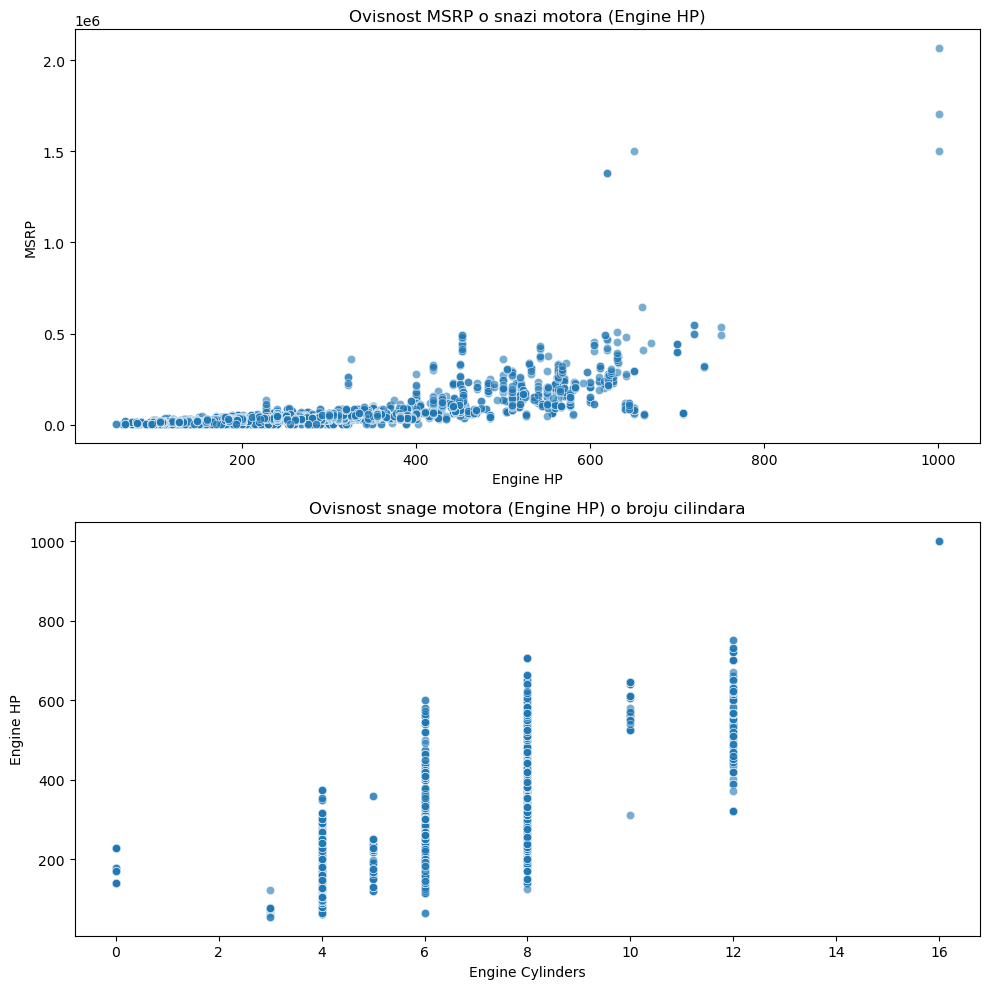

In [37]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.scatterplot(data=data, x='Engine HP', y='MSRP', alpha=0.6)
plt.title('Ovisnost MSRP o snazi motora (Engine HP)')
plt.xlabel('Engine HP')
plt.ylabel('MSRP')

plt.subplot(2, 1, 2)
sns.scatterplot(data=data, x='Engine Cylinders', y='Engine HP', alpha=0.6)
plt.title('Ovisnost snage motora (Engine HP) o broju cilindara')
plt.xlabel('Engine Cylinders')
plt.ylabel('Engine HP')

plt.tight_layout()
plt.show()

# 🛠️ Obrada podataka: outlieri, kategorijske varijable i skaliranje

In [38]:
data = data[data['Engine Cylinders'] != 0]
data['average_mpg'] = (data['highway MPG'] + data['city mpg']) / 2
data = data.drop(columns=['highway MPG', 'city mpg'])

In [39]:
def remove_outliers_iqr(df, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean
kolone = ['Engine HP','Popularity','Vehicle Age','MSRP']
data = remove_outliers_iqr(data, kolone)

In [54]:
data.head()

,Make,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,Popularity,MSRP,Vehicle Age,average_mpg
0,BMW,premium,335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,3916,46135,14,22.5
1,BMW,premium,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,3916,40650,14,23.5
2,BMW,premium,300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,3916,36350,14,24.0
3,BMW,premium,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,3916,29450,14,23.0
4,BMW,premium,230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,3916,34500,14,23.0


In [40]:
data_label_encoded = data.copy()

label_encoders = {}
columns_to_encode = ['Make', 'Engine Fuel Type', 'Transmission Type', 'Driven_Wheels', 'Vehicle Size', 'Vehicle Style']
import joblib
for col in columns_to_encode:
    le = LabelEncoder()
    data_label_encoded[col] = le.fit_transform(data_label_encoded[col])
    label_encoders[col] = le
# Spremi svaki label encoder
for col, le in label_encoders.items():
    joblib.dump(le, f"label_encoder_{col}.pkl")
data_label_encoded.head()

,Make,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,Popularity,MSRP,Vehicle Age,average_mpg
0,3,4,335.0,6.0,3,3,2.0,0,8,3916,46135,14,22.5
1,3,4,300.0,6.0,3,3,2.0,0,6,3916,40650,14,23.5
2,3,4,300.0,6.0,3,3,2.0,0,8,3916,36350,14,24.0
3,3,4,230.0,6.0,3,3,2.0,0,8,3916,29450,14,23.0
4,3,4,230.0,6.0,3,3,2.0,0,6,3916,34500,14,23.0


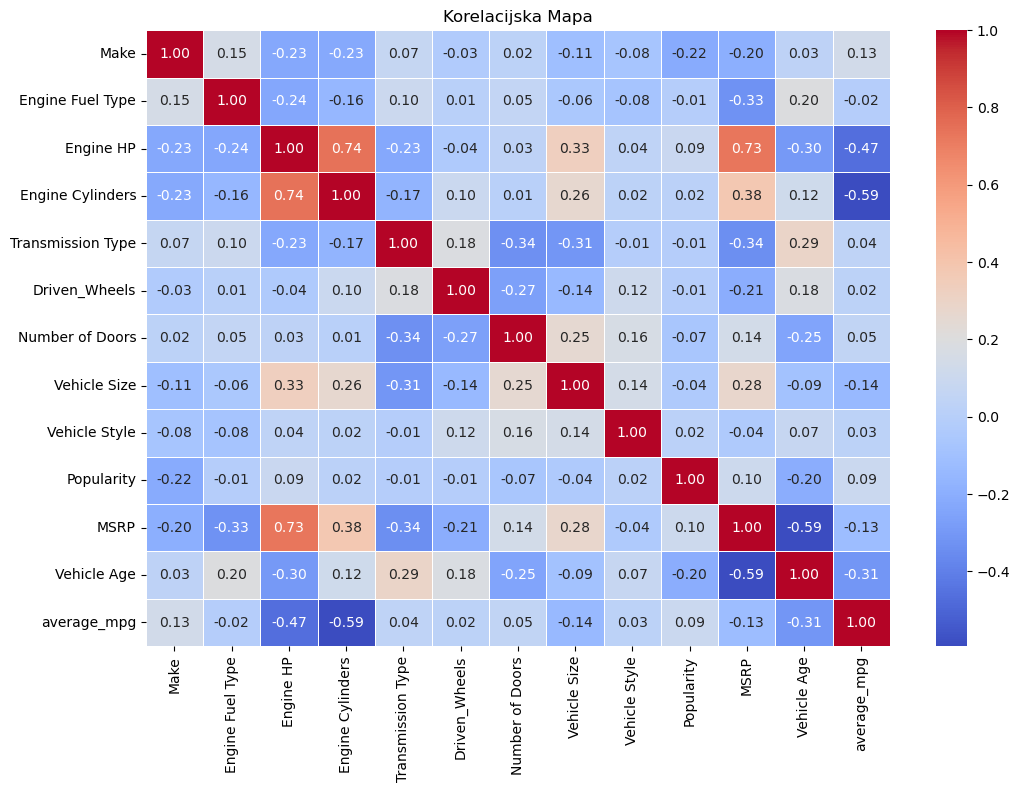

In [41]:
# Izračunaj korelacijsku matricu
correlation_matrix = data_label_encoded.corr()
plt.figure(figsize=(12, 8))  # Veličina figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelacijska Mapa')
plt.show()

In [42]:
scaler = StandardScaler()
numericke_varijable = ['Engine HP', 'Engine Cylinders','average_mpg', 'Popularity', 'Vehicle Age']
data_label_encoded[numericke_varijable] = scaler.fit_transform(data_label_encoded[numericke_varijable])
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [43]:
data_label_encoded.describe()

,Make,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,Popularity,MSRP,Vehicle Age,average_mpg
count,8842.000000,8842.000000,8.842000e+03,8.842000e+03,8842.000000,8842.000000,8842.000000,8842.000000,8842.000000,8.842000e+03,8842.000000,8.842000e+03,8.842000e+03
mean,18.005655,4.422076,-1.655415e-16,1.928639e-16,1.399005,1.714544,3.551346,0.994458,8.303438,-8.518155e-17,30643.120900,-3.696558e-17,1.880423e-16
std,11.512855,1.011013,1.000057e+00,1.000057e+00,0.865735,1.049478,0.819897,0.891636,4.966884,1.000057e+00,14690.465751,1.000057e+00,1.000057e+00
min,0.000000,0.000000,-2.290179e+00,-1.687832e+00,0.000000,0.000000,2.000000,0.000000,0.000000,-1.384309e+00,2000.000000,-8.976920e-01,-1.816584e+00
25%,6.000000,4.000000,-8.041181e-01,-9.691663e-01,1.000000,1.000000,4.000000,0.000000,3.000000,-7.731715e-01,21881.250000,-7.381465e-01,-6.204761e-01
50%,16.000000,5.000000,-1.580048e-01,4.681649e-01,1.000000,2.000000,4.000000,1.000000,9.000000,-2.361115e-01,29740.000000,-5.786009e-01,-1.719355e-01
75%,29.000000,5.000000,7.465540e-01,4.681649e-01,1.000000,2.000000,4.000000,2.000000,14.000000,7.338373e-01,39505.000000,5.382183e-01,5.008754e-01
max,36.000000,5.000000,3.266396e+00,4.780158e+00,3.000000,3.000000,4.000000,2.000000,15.000000,3.123986e+00,71500.000000,2.771856e+00,2.472207e+01


# 🧠 Učenje modela i analiza performansi

In [44]:
X = data_label_encoded.drop('MSRP', axis=1)
y = data_label_encoded['MSRP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

In [46]:
print("RMSE:", root_mean_squared_error(y_test, rf_predictions))
print("R2 score:", r2_score(y_test, rf_predictions))

RMSE: 3452.082382198272
R2 score: 0.9454933233768508


In [53]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
# Tek sada spremanje ima smisla
joblib.dump(xgb_model, "xgb_model.pkl")

['xgb_model.pkl']

In [48]:
print("RMSE:", root_mean_squared_error(y_test, xgb_pred))
print("R2 score:", r2_score(y_test, xgb_pred))

RMSE: 3161.45068359375
R2 score: 0.9542848467826843


In [49]:
dt = DecisionTreeRegressor(
    max_depth=20,              
    random_state=42
)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

In [50]:
print("RMSE:", root_mean_squared_error(y_test, dt_pred))
print("R2 score:", r2_score(y_test, dt_pred))

RMSE: 3937.5506989879336
R2 score: 0.9290847370274489


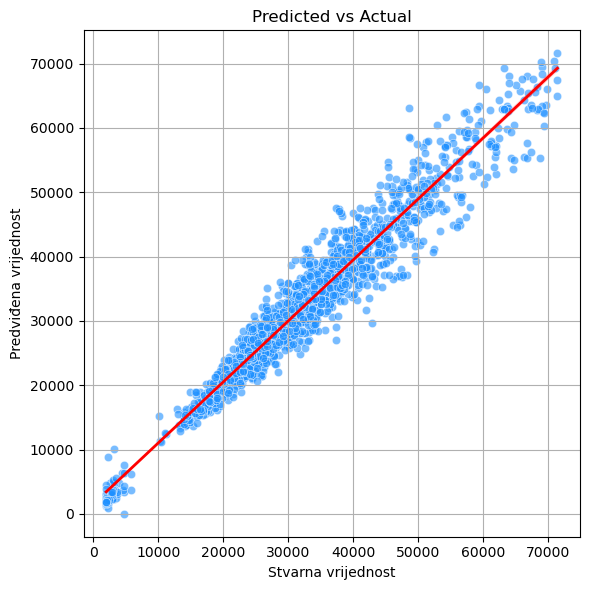

In [51]:
plt.figure(figsize=(6,6))

# Scatter plot s transparencijom (alpha=0.6)
sns.scatterplot(x=y_test, y=xgb_pred, color='dodgerblue', alpha=0.6)

# Dodavanje regresijske linije
sns.regplot(x=y_test, y=xgb_pred, scatter=False, line_kws={'color': 'red', 'lw': 2})

# Dodavanje oznaka i mreže
plt.xlabel('Stvarna vrijednost')
plt.ylabel('Predviđena vrijednost')
plt.title(f'Predicted vs Actual')
plt.grid(True)
plt.tight_layout()
plt.show()



In [52]:
# Definiraj XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=10)

# Kroz K-Fold cross-validation s negativnim MSE
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Izračunaj RMSE
rmse_scores = np.sqrt(-cv_scores)

# Ispis rezultata
print(f"K-Fold Cross Validation RMSE Scores: {rmse_scores}")
print(f"Mean RMSE: {rmse_scores.mean()}")

K-Fold Cross Validation RMSE Scores: [3321.56393887 3249.47595775 3222.84362016 3238.51941479 3118.30370554]
Mean RMSE: 3230.14132742328
